# data processing 


This is a data processing part, merging version 1 data exploration and version 10 of feature editing

Some methods and codes of this version of preprocessing and modeling are from the following works
1. kaggle website ML from start to finish with sk-learn https://www.kaggle.com/kernels/scriptcontent/320209/output and
2. make-your-first-sub-Daniel-Bourke https://github.com/mrdbourke/your-first-kaggle-submission
3. In-Depth Visualisations - Simple Methods https://www.kaggle.com/kernels/scriptcontent/6824709/notebook

Major modification of features

selected features: pclass, parch, scisp, sex, fare, age, embark
created features: ischild (from age), isfemale
one_hot features: pclass
dropped features: name (last name, prefix), ticket, cabnet(lack of data),
this version leave Fare and age as it is, but still create Ischild

fill in the missing master age as 6

simplify age and fare, remove bin

edit embarked, fill in 'C'

introduced normalization of Fare and age



## Setup

In [2]:
%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import missingno





# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

## Loading data



In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
pandas_profiling.ProfileReport(train)

In [5]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
train.describe(include=['O'])

Name   Sex Ticket        Cabin Embarked
count                            891   891    891          204      889
unique                           891     2    681          147        3
top     Eitemiller, Mr. George Floyd  male   1601  C23 C25 C27        S
freq                               1   577      7            4      644

In [7]:
pandas_profiling.ProfileReport(test)

## Check missing data



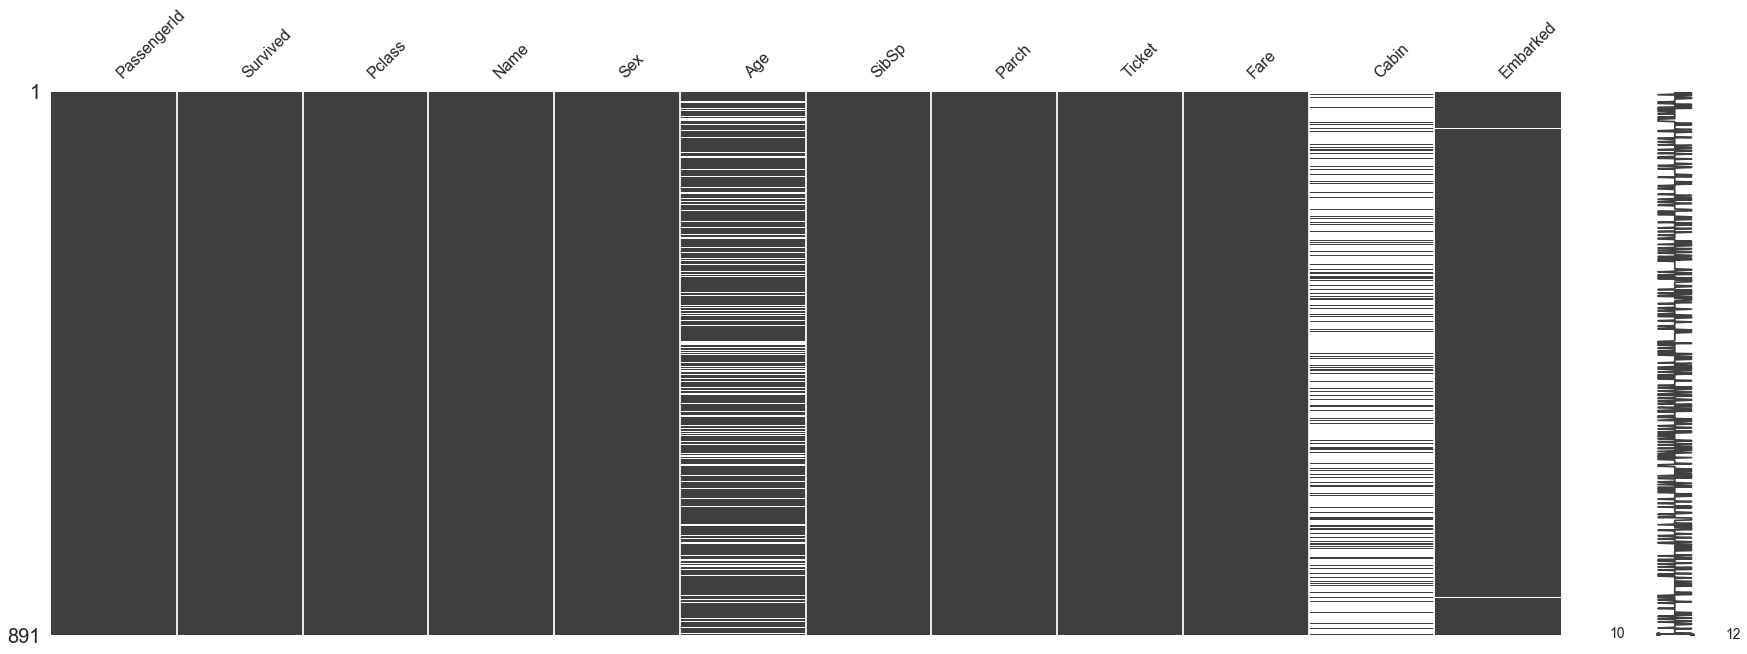

In [8]:
missingno.matrix(train, figsize = (30,10))

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

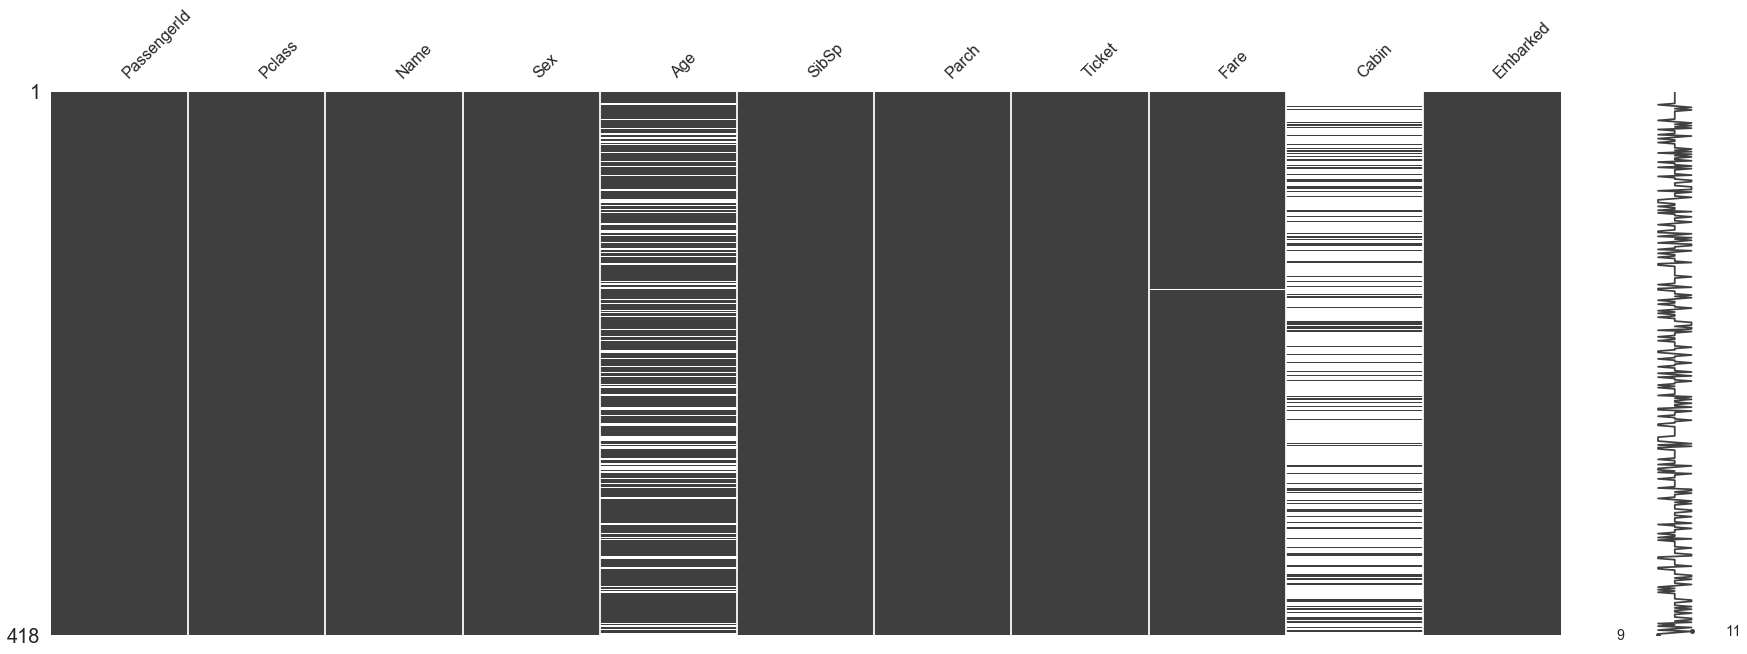

In [12]:
missingno.matrix(test, figsize = (30,10))

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Features

...

In [14]:
train['Died'] = 1 - train['Survived']


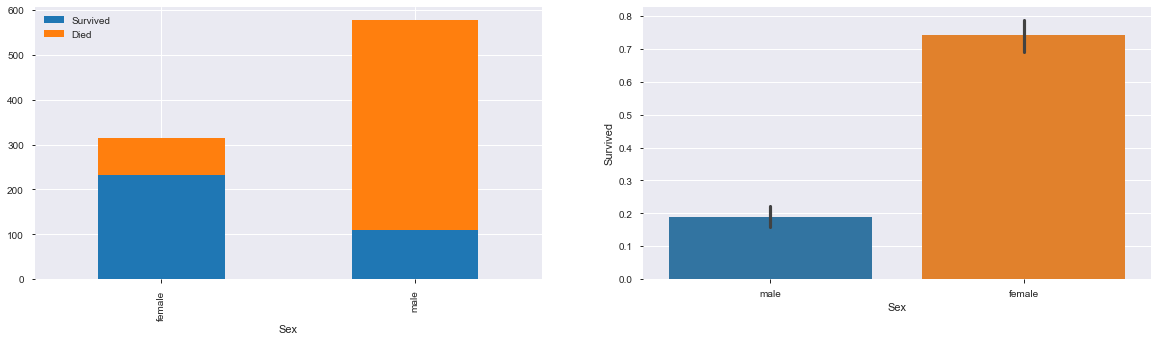

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                          stacked=True,ax=ax[0])
sns.barplot(x="Sex", y="Survived", data=train, ax=ax[1])

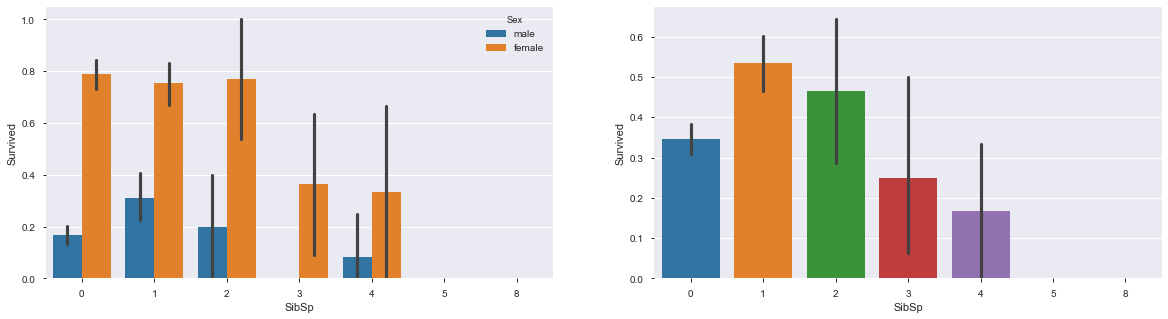

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="SibSp", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="SibSp", y="Survived", data=train, ax=ax[1])

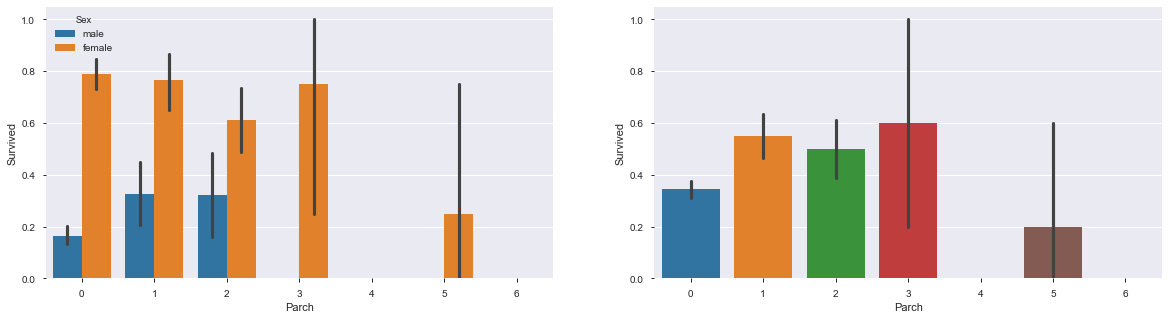

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="Parch", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="Parch", y="Survived", data=train, ax=ax[1])

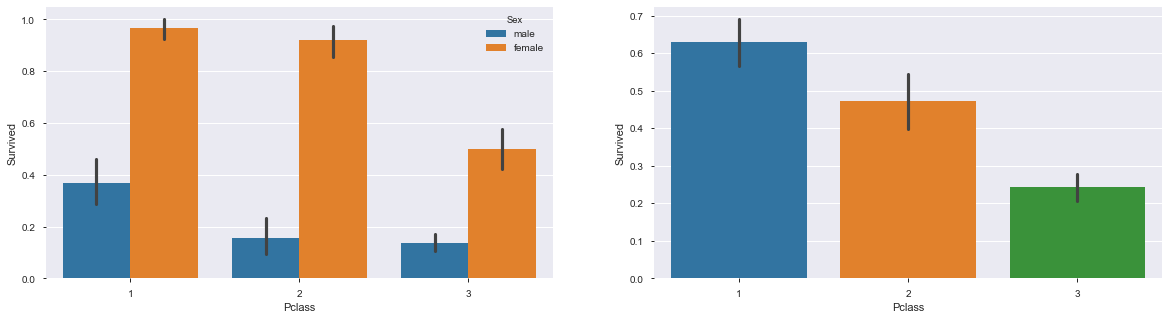

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="Pclass", y="Survived", data=train, ax=ax[1])

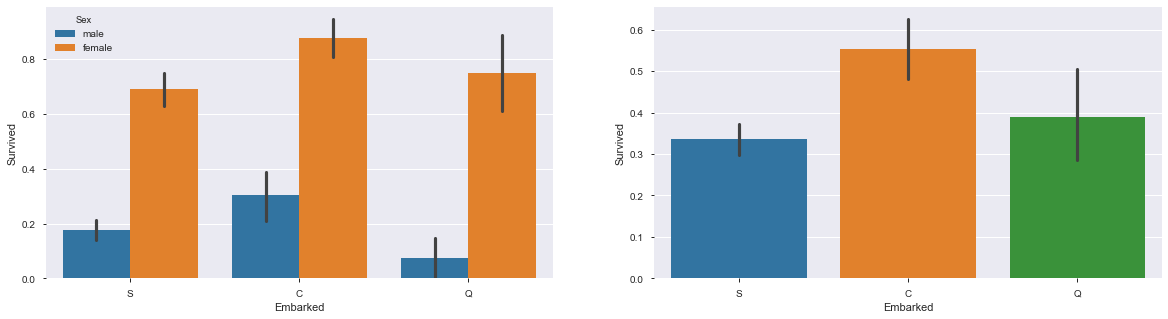

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax=ax[0])
sns.barplot(x="Embarked", y="Survived", data=train, ax=ax[1])

In [20]:
train[train.Embarked.isnull()]


PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Died  
61   female  38.0      0      0  113572  80.0   B28      NaN     0  
829  female  62.0      0      0  113572  80.0   B28      NaN     0

## Comment on features
 
...



## Transforming Features


PassengerId      int64

Survived         int64  0 = No, 1 = Yes

------------------------
keep

Pclass           int64  --> one hot enc

Sex             object   --> one hot enc

Age            float64  --> ischild --> one hot enc   fill in missing value in non-child bins.

SibSp            int64

Parch            int64





-------------------------------
drop

Name            object

Ticket          object

Cabin           object

Embarked        object



Fare           float64   -->  Fare_tier 3  --> one hot enc,  1 missing value in test set


In [21]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Died  
0      0         A/5 21171   7.2500   NaN        S     1  
1      0          PC 17599  71.2833   C85        C     0  
2      0  STON/O2. 3101282   7.9250   NaN        S     0  
3      0            113803  53.1000  C123        S     0  
4      0            373450   8.0500   NaN        S     1

### creat 'isfemale' feature

In [22]:
train['Isfemale'] = np.where(train.Sex == 'female', 1, 0)
test['Isfemale'] = np.where(test.Sex == 'female', 1, 0)

### creat 'isfemale' feature

In [23]:
train['Ismaster'] = np.where(train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) == 'Master', 1, 0)

test['Ismaster'] = np.where(test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) == 'Master', 1, 0)

In [24]:
train[['Ismaster','Age','Sex','Survived']].loc[train.Ismaster==1,:].loc[train.Age.isna(),:]

Ismaster  Age   Sex  Survived
65          1  NaN  male         1
159         1  NaN  male         0
176         1  NaN  male         0
709         1  NaN  male         1

In [25]:
train_master_nas = np.isnan(train.Age) & (train.Ismaster==1)
train_master_nas[train_master_nas == True]

65     True
159    True
176    True
709    True
dtype: bool

In [26]:
test[['PassengerId','Ismaster','Age','Sex']].loc[test.Ismaster==1,:].loc[test.Age.isna(),:]

PassengerId  Ismaster  Age   Sex
244         1136         1  NaN  male
339         1231         1  NaN  male
344         1236         1  NaN  male
417         1309         1  NaN  male

In [27]:
test_master_nas = np.isnan(test.Age) & (test.Ismaster==1)
test_master_nas[test_master_nas == True]

244    True
339    True
344    True
417    True
dtype: bool

In [28]:
# the age group will be seperated into only two, child or not. 0-12 is consided child. 
# fill age with a distribution
train['Age_fill'] = train['Age']
ages = train['Age_fill'].dropna()
std_ages = ages.std()
mean_ages = ages.mean()

train_nas = np.isnan(train["Age_fill"])

np.random.seed(122)

impute_age_train  = np.random.randint(mean_ages - std_ages, mean_ages + std_ages, size = train_nas.sum())

train["Age_fill"][train_nas] = impute_age_train

train_master_nas = np.isnan(train.Age) & (train.Ismaster==1)

train["Age_fill"][train_master_nas] = 6.0                 # correct age of the known "master" aka boys that was NaN

train['Ischild'] = np.where(train.Age_fill <= 12, 1, 0)


test['Age_fill'] = test['Age']

test_nas = np.isnan(test["Age_fill"])

impute_age_test  = np.random.randint(mean_ages - std_ages, mean_ages + std_ages, size = test_nas.sum())

test["Age_fill"][test_nas] = impute_age_test # fill in distribution

test_master_nas = np.isnan(test.Age) & (test.Ismaster==1)

test["Age_fill"][test_master_nas] = 6.0                 # correct age of the known "master" aka boys that was NaN

test['Ischild'] = np.where(test.Age_fill <= 12, 1, 0)


In [29]:
train.Ischild[train.Ischild>0]

7      1
10     1
16     1
24     1
43     1
      ..
827    1
831    1
850    1
852    1
869    1
Name: Ischild, Length: 73, dtype: int32

In [31]:
test.Ischild[test.Ischild>0]

21     1
55     1
80     1
89     1
117    1
120    1
140    1
161    1
192    1
194    1
196    1
201    1
203    1
244    1
250    1
263    1
281    1
283    1
284    1
296    1
307    1
326    1
339    1
344    1
354    1
379    1
389    1
409    1
417    1
Name: Ischild, dtype: int32

In [32]:
train.Age_fill[train.Age_fill ==6.0]

65     6.0
159    6.0
176    6.0
709    6.0
720    6.0
751    6.0
813    6.0
Name: Age_fill, dtype: float64

In [33]:
test.Age_fill[test.Age_fill ==6.0]

80     6.0
196    6.0
244    6.0
339    6.0
344    6.0
389    6.0
417    6.0
Name: Age_fill, dtype: float64

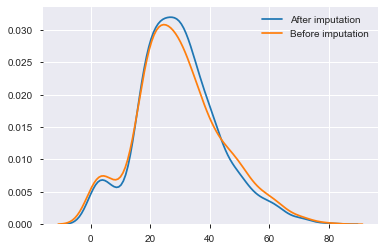

In [34]:
sns.kdeplot(train.Age_fill, label = 'After imputation');
sns.kdeplot(ages, label = 'Before imputation');

### fare

In [35]:
#Fare

# train set
train['Fare_fill'] = train.Fare



# test set
test['Fare_fill'] = test.Fare.fillna(5)  # only one missing value, so fill in the most likely bin


### pclass

In [36]:
train_Plcass_one_hot = pd.get_dummies(train['Pclass'], 
                                   prefix='Pclass')
test_Plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='Pclass')

In [37]:
train.Embarked=train.Embarked.fillna('C')
train_Embarked_one_hot = pd.get_dummies(train['Embarked'], 
                                   prefix='Embarked')

test.Embarked=test.Embarked.fillna('C')
test_Embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                   prefix='Embarked')

In [38]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Died  Isfemale  Ismaster  \
0      0         A/5 21171   7.2500   NaN        S     1         0         0   
1      0          PC 17599  71.2833   C85        C     0         1         0   
2      0  STON/O2. 3101282   7.9250   NaN        S     0         1         0   
3      0            113803  53.1000  C123        S     0         1         0   
4      0            373450   8.0500   NaN        S     1         0         0   

   Age_fill  Ischild  Fare_fill  
0      22.0        0     7.2500  
1      38.0        0    71.2833  
2      26.0        0     7.9250  
3      35.0        0    53.1000  
4      35.0        0     8.0500

## Correlation of the features

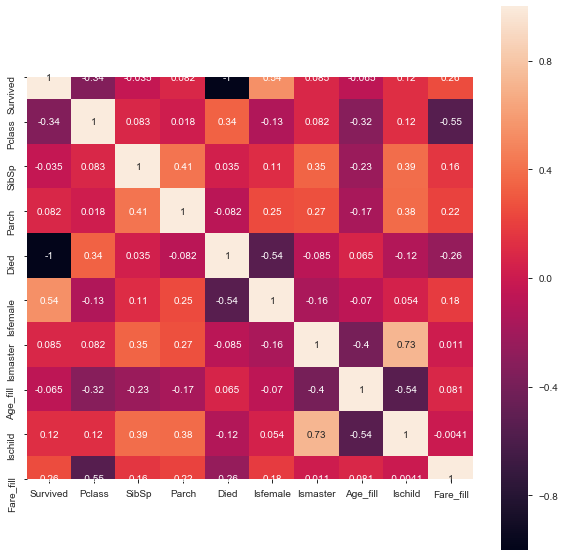

In [39]:
plt.figure(figsize=(10, 10))
corrmap = sns.heatmap(train.drop(['PassengerId','Name', 'Sex', 'Age','Fare',  'Ticket', 'Cabin'],axis=1).corr(), square=True, annot=True)

## Drop excluded and junk features

In [40]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Died  Isfemale  Ismaster  \
0      0         A/5 21171   7.2500   NaN        S     1         0         0   
1      0          PC 17599  71.2833   C85        C     0         1         0   
2      0  STON/O2. 3101282   7.9250   NaN        S     0         1         0   
3      0            113803  53.1000  C123        S     0         1         0   
4      0            373450   8.0500   NaN        S     1         0         0   

   Age_fill  Ischild  Fare_fill  
0      22.0        0     7.2500  
1      38.0        0    71.2833  
2      26.0        0     7.9250  
3      35.0        0    53.1000  
4      35.0        0     8.0500

In [41]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Isfemale  Ismaster  \
0  34.5      0      0   330911   7.8292   NaN        Q         0         0   
1  47.0      1      0   363272   7.0000   NaN        S         1         0   
2  62.0      0      0   240276   9.6875   NaN        Q         0         0   
3  27.0      0      0   315154   8.6625   NaN        S         0         0   
4  22.0      1      1  3101298  12.2875   NaN        S         1         0   

   Age_fill  Ischild  Fare_fill  
0      34.5        0     7.8292  
1      47.0        0     7.0000  
2      62.0        0     9.6875  
3      27.0        0     8.6625  
4      22.0        0    12.2875

In [43]:
drop_list =['Pclass', 'Sex', 'Age',  'Ismaster',  'Fare',  'Ticket', 'Name', 'Embarked', 'Cabin']

df_train = train.drop(drop_list+['Died'], axis=1)

df_test = test.drop(drop_list, axis=1)

In [44]:
df_train = pd.concat([df_train,
                      train_Embarked_one_hot,
                        train_Plcass_one_hot
                       ], axis=1)

df_test = pd.concat([df_test,
                      test_Embarked_one_hot,
                      test_Plcass_one_hot
                        ], axis=1)

In [45]:
#normalize columns, set mean =1, min =0
def normalized(data,columns):
    for column in columns:
        data[column] = (data[column]-data[column].min())/(data[column].mean()-data[column].min())

In [46]:
normalized(df_train, ['Fare_fill','Age_fill','Parch'] )
normalized(df_test, ['Fare_fill','Age_fill','Parch'] )

In [47]:
df_train.head()

PassengerId  Survived  SibSp  Parch  Isfemale  Age_fill  Ischild  \
0            1         0      1    0.0         0  0.741556        0   
1            2         1      1    0.0         1  1.291367        0   
2            3         1      0    0.0         1  0.879009        0   
3            4         1      1    0.0         1  1.188277        0   
4            5         0      0    0.0         0  1.188277        0   

   Fare_fill  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0   0.225126           0           0           1         0         0         1  
1   2.213478           1           0           0         1         0         0  
2   0.246086           0           0           1         0         0         1  
3   1.648853           0           0           1         1         0         0  
4   0.249967           0           0           1         0         0         1

In [48]:
df_test.head()

PassengerId  SibSp    Parch  Isfemale  Age_fill  Ischild  Fare_fill  \
0          892      0  0.00000         0  1.175411        0   0.220206   
1          893      1  0.00000         1  1.603394        0   0.196884   
2          894      0  0.00000         0  2.116973        0   0.272473   
3          895      0  0.00000         0  0.918622        0   0.243644   
4          896      1  2.54878         1  0.747429        0   0.345602   

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           1           0         0         0         1  
1           0           0           1         0         0         1  
2           0           1           0         0         1         0  
3           0           0           1         0         0         1  
4           0           0           1         0         0         1

# save data

In [49]:
df_train.to_csv('data/df_train_dp.csv', index = False)
df_test.to_csv('data/df_test_dp.csv', index = False)